# Trabajo Practico 2: Filtros y Deteccion de bordes
<p style='text-align: justify;'>
    En este trabajo practico se implementa un algoritmo que:

   * Calcula los gradientes en la imagen (direccion y modulo)
   * Muestra imagenes de angulo y modulo
   * Marca con color las direcciones de gradientes mas altos
    
</p>

In [1]:
%matplotlib inline
#%matplotlib
import math
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Importamos librerías para manejo de tiempo
import time

<p style='text-align: justify;'>
    La siguiente funcion hace uso del filtro de Sobel para calcular los gradientes de magnitud y direccion de la imagen de entrada.
</p>

In [2]:
def mag_angle(image):
    # Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv.Sobel(image,cv.CV_32F,1,0,ksize=3)
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64/absx_64.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)

    # Sobely en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobely_64 = cv.Sobel(image,cv.CV_32F,0,1,ksize=3)
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64/absy_64.max()*255
    sobely_8u = np.uint8(sobely_8u1)
    
    # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)

    # Encontramos la Dirección y la pasamos a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    
    return mag, theta

<p style='text-align: justify;'>
    La funcion "show_gradients" normaliza en un rango de 0 a 1 las magnitudes y los vectores. Esto es necesario para su representacion en un mapa de colores.
</p>

In [3]:
def show_gradients(magnitud, theta):
    mag_norm = magnitud/np.max(magnitud)
    theta_show = (theta+math.pi)/(2*math.pi)
    
    # Show the images
    f, axarr = plt.subplots(2, 1, figsize=(15, 15))
    axarr[0].imshow(mag_norm, cmap='inferno')
    axarr[1].imshow(theta_show, cmap='inferno')
    return None

<p style='text-align: justify;'>
    La siguiente funcion recibe la imagen original a color, el gradiente de magnitudes y un percentil de intensidad. Con estras tres matrices crea una mascara para pintar de rojo aquellos pixeles que su magnitud esta por encima a dicho percentil.
</p>

In [4]:
def show_most_intense(img, mag, intencity):
    imgen2 = img.copy()
    maskmag = (mag/np.max(mag)) > intencity
    maskmag = (maskmag * 255).astype(np.uint8)

    for i in range(imgen2.shape[0]):
        for j in range(imgen2.shape[1]):
            if maskmag[i, j] > imgen2[i, j, 0]:
                imgen2[i, j, :] = [255, 0, 0] 

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(imgen2)
    return None

### Metalgrid

In [5]:
img = cv.imread('metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

<p style='text-align: justify;'>
    En primer lugar utilizaremos un filtro gaussiano 5x5 con media 0 para reducir el ruido de la imagen.
</p>

In [6]:
# Suavizado Gaussiano
#====================
blur = cv.GaussianBlur(gray,(5,5),0)
#blur = gray


<p style='text-align: justify;'>
    A traves de la funcion de mag_angle, obtenemos los gradientes de magnitud y direccion de nuestra imagen.
</p>

In [7]:
# Gradientes de magnitud y direccion
#====================================
mag, theta = mag_angle(blur)

# Pasaje de radianes a grados del gradiente de direccion
angle = np.rad2deg(theta)

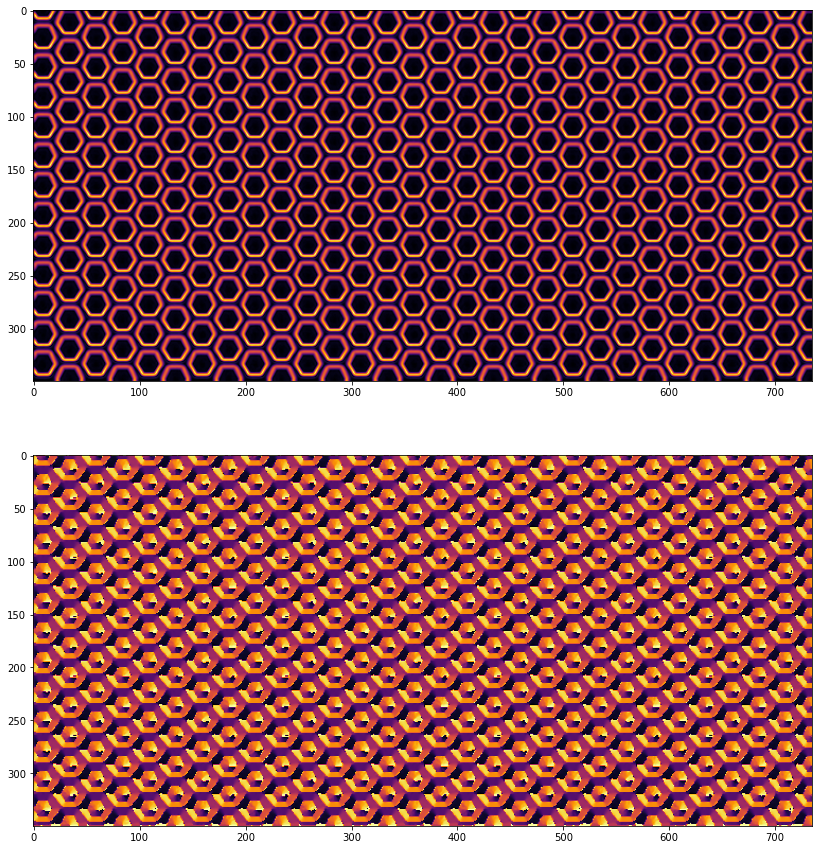

In [8]:
show_gradients(mag, angle)

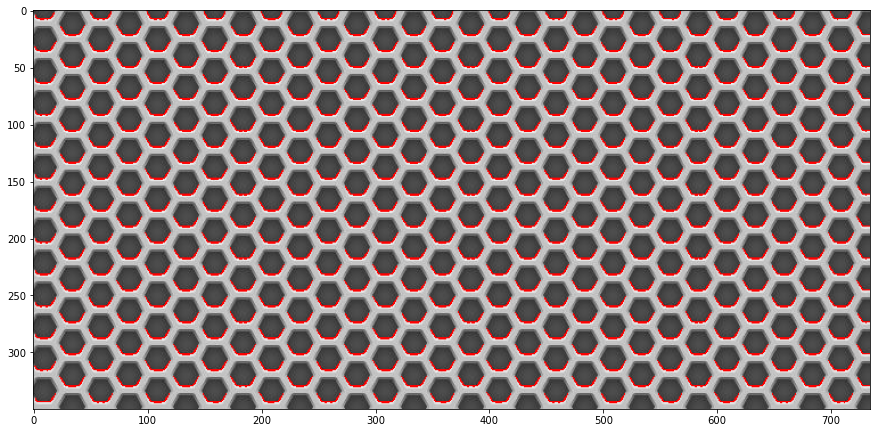

In [9]:
intencity = 0.8
show_most_intense(img, mag, intencity)

### Spyder Web

In [10]:
img2 = cv.imread('tela2.jpg')
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [11]:
# Suavizado Gaussiano
#====================
blur2 = cv.GaussianBlur(gray2,(5,5),0)

In [12]:
# Gradientes de magnitud y direccion
#====================================
mag2, theta2 = mag_angle(blur2)

# Pasaje de radianes a grados del gradiente de direccion
angle2 = np.rad2deg(theta2)

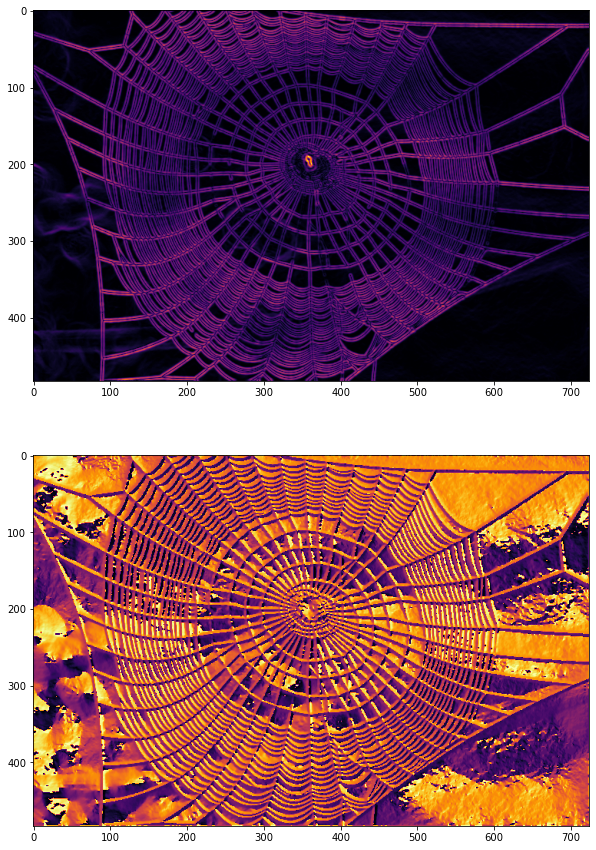

In [13]:
show_gradients(mag2, angle2)

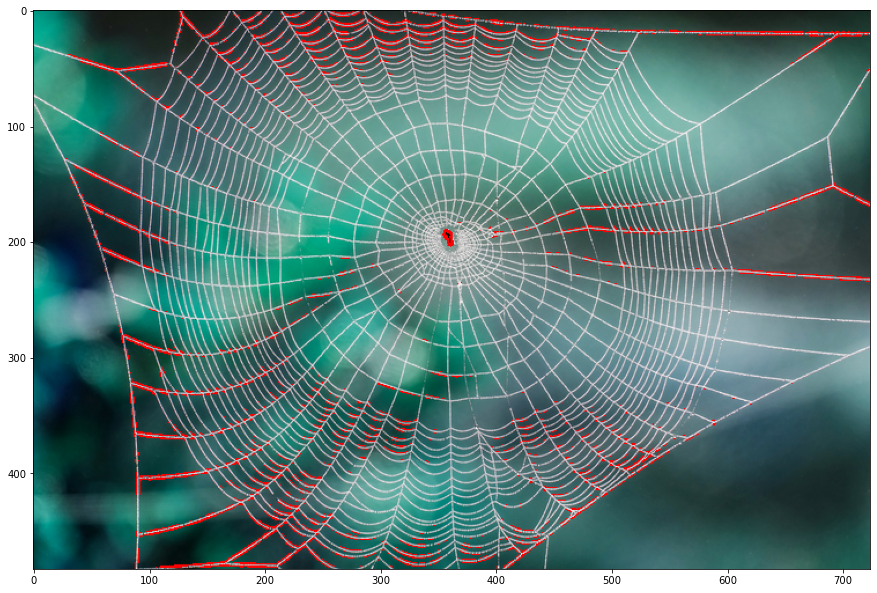

In [14]:
intencity2 = 0.4
show_most_intense(img2, mag2, intencity2)